## Predicting Start-up Success

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
os.getcwd()


'/Users/yusufsmacbookpro/Desktop/Springboard/DataScienceGuidedCapstone/Notebooks'

In [3]:
# the supplied CSV data file is the raw_data directory
df = pd.read_csv('/Users/yusufsmacbookpro/Desktop/startup_data.csv')

In [4]:
#Code task 2#
#Call the info method on ski_data to see a summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [5]:
#Code task 3#
#Call the head method on ski_data to print the first several rows of the data
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


### 2.6.1 Find Your Resort Of Interest<a id='2.6.1_Find_Your_Resort_Of_Interest'></a>

Your resort of interest is called Big Mountain Resort. Check it's in the data:

In [6]:
# We see that out of 923 companies 597 were acquired
df[df.status == 'acquired']

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
6,195,CA,37.391559,-122.070264,94041,c:16191,Mountain View,NaN,RingCube Technologies,1,...,c:16191,1,0,1,1,0,0,1.6667,1,acquired
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,284,NY,40.742953,-73.984461,10018,c:17758,New York,NaN,TRAFFIQ,1,...,c:17758,1,0,1,1,0,0,2.3333,1,acquired
917,1099,WA,47.802184,-122.196307,98021,c:8339,Bothell,NaN,Dexterra,1,...,c:8339,1,0,0,0,1,1,5.6000,1,acquired
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired


Count the number of missing values in each column and sort them.

In [7]:
#number of missing column values and percentages in each row
missing = pd.concat([df.isnull().sum(axis=1), 100 * df.isnull().mean(axis=1)], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False).head()

,count,%
311,4,8.163265
396,4,8.163265
312,4,8.163265
260,4,8.163265
906,4,8.163265


In [8]:
#Number of missing values for each column
df.isnull().sum().sort_values(ascending=False).head(10)

closed_at                   588
Unnamed: 6                  493
age_last_milestone_year     152
age_first_milestone_year    152
state_code.1                  1
zip_code                      0
age_first_funding_year        0
milestones                    0
funding_total_usd             0
funding_rounds                0
dtype: int64

In [9]:
#percentage of missing values 
print("Percentage of missing values in 'closed_at' column: % {:.2f}". format((df.closed_at.isnull().sum())/len(df)*100))
print("Percentage of missing values in 'Unnamed: 6' column: % {:.2f}". format((df["Unnamed: 6"].isnull().sum())/len(df)*100))
print("Percentage of missing values in 'age_last_milestone_year' column  : % {:.2f}". format((df.age_last_milestone_year.isnull().sum())/len(df)*100))
print("percentage of missing values in 'age_first_milestone_year' column : % {:.2f}". format((df.age_first_milestone_year.isnull().sum())/len(df)*100))


Percentage of missing values in 'closed_at' column: % 63.71
Percentage of missing values in 'Unnamed: 6' column: % 53.41
Percentage of missing values in 'age_last_milestone_year' column  : % 16.47
percentage of missing values in 'age_first_milestone_year' column : % 16.47


In [10]:
#Code task 6#
#Use ski_data's `select_dtypes` method to select columns of dtype 'object'
df.select_dtypes('object')

,state_code,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,state_code.1,category_code,object_id,status
0,CA,92101,c:6669,San Diego,NaN,Bandsintown,1/1/2007,NaN,4/1/2009,1/1/2010,CA,music,c:6669,acquired
1,CA,95032,c:16283,Los Gatos,NaN,TriCipher,1/1/2000,NaN,2/14/2005,12/28/2009,CA,enterprise,c:16283,acquired
2,CA,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,NaN,3/30/2010,3/30/2010,CA,web,c:65620,acquired
3,CA,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,NaN,2/17/2005,4/25/2007,CA,software,c:42668,acquired
4,CA,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,CA,games_video,c:65806,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,CA,94107,c:21343,San Francisco,NaN,CoTweet,1/1/2009,NaN,7/9/2009,7/9/2009,CA,advertising,c:21343,acquired
919,MA,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,1/1/1998,6/25/2008,4/1/2005,3/23/2007,MA,security,c:41747,closed
920,CA,94089,c:31549,Sunnyvale,NaN,Paracor Medical,1/1/1999,6/17/2012,6/29/2007,6/29/2007,CA,biotech,c:31549,closed
921,CA,94404,c:33198,San Francisco,NaN,Causata,1/1/2009,NaN,10/5/2009,11/1/2011,CA,software,c:33198,acquired


In [11]:
# We see that we have redwood systems twice
df['name'].value_counts().head()

Redwood Systems     2
EQAL                1
NextIO              1
Mophie              1
IonLogix Systems    1
Name: name, dtype: int64

In [12]:
# We see that these are exact duplicates
df[df['name'] == 'Redwood Systems']

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
124,506,CA,37.54827,-121.988572,94538,c:28482,Fremont,Fremont CA 94538,Redwood Systems,1,...,c:28482,1,0,1,1,1,0,2.25,1,acquired
832,505,CA,37.48151,-121.945328,94538,c:28482,Fremont,NaN,Redwood Systems,1,...,c:28482,1,0,1,1,1,0,2.25,1,acquired


In [13]:
# We dropped one if the duplicates
df.drop([832], inplace=True)

In [14]:
df.shape

(922, 49)

In [15]:
# While were dropping lets drop the unnecessary columns as well "Unnamed: 6", "Unnamed: 0", "id", "State_code.1"
df.drop(["Unnamed: 6"],axis=1, inplace=True)
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df.drop(["id"], axis=1, inplace=True)
df.drop(["state_code.1"], axis=1, inplace=True)
df.drop(["closed_at"], axis=1, inplace=True)

In [16]:
df.shape

(922, 44)

In [17]:
# We also need to convert the year colums from object to datetime
df.founded_at=pd.to_datetime(df.founded_at)
df.first_funding_at=pd.to_datetime(df.first_funding_at)
df.last_funding_at=pd.to_datetime(df.last_funding_at)

df.head()

,state_code,latitude,longitude,zip_code,city,name,labels,founded_at,first_funding_at,last_funding_at,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,CA,42.358880,-71.056820,92101,San Diego,Bandsintown,1,2007-01-01,2009-04-01,2010-01-01,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,CA,37.238916,-121.973718,95032,Los Gatos,TriCipher,1,2000-01-01,2005-02-14,2009-12-28,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,CA,32.901049,-117.192656,92121,San Diego,Plixi,1,2009-03-18,2010-03-30,2010-03-30,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,CA,37.320309,-122.050040,95014,Cupertino,Solidcore Systems,1,2002-01-01,2005-02-17,2007-04-25,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,CA,37.779281,-122.419236,94105,San Francisco,Inhale Digital,0,2010-08-01,2010-08-01,2012-04-01,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


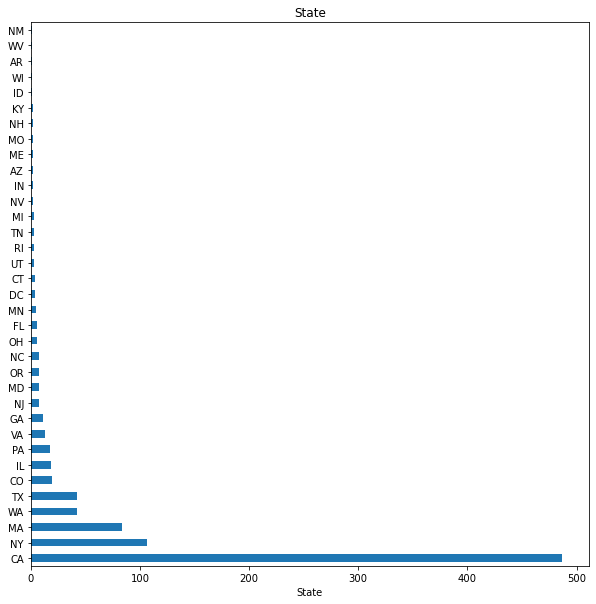

In [18]:
# We can see California has, by far,  the most companies out of all the states
df.state_code.value_counts().plot(kind='barh', figsize=(10, 10), title='State')
plt.xlabel('State');


In [19]:
# Here is the statistical summary of the numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,922.0,3.851857e+01,3.743372e+00,25.752358,3.738887e+01,3.777928e+01,4.073065e+01,5.933523e+01
longitude,922.0,-1.035192e+02,2.239810e+01,-122.756956,-1.221998e+02,-1.183655e+02,-7.721361e+01,1.805712e+01
labels,922.0,6.464208e-01,4.783400e-01,0.000000,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
age_first_funding_year,922.0,2.237235e+00,2.511337e+00,-9.046600,5.746500e-01,1.449350e+00,3.578075e+00,2.189590e+01
age_last_funding_year,922.0,3.930933e+00,2.969478e+00,-9.046600,1.669175e+00,3.520550e+00,5.560925e+00,2.189590e+01
age_first_milestone_year,770.0,3.055706e+00,2.978976e+00,-14.169900,1.000000e+00,2.519150e+00,4.688350e+00,2.468490e+01
age_last_milestone_year,770.0,4.755399e+00,3.214081e+00,-7.005500,2.397300e+00,4.482200e+00,6.753400e+00,2.468490e+01
relationships,922.0,7.703905e+00,7.266762e+00,0.000000,3.000000e+00,5.000000e+00,1.000000e+01,6.300000e+01
funding_rounds,922.0,2.309111e+00,1.390562e+00,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,1.000000e+01
funding_total_usd,922.0,2.541017e+07,1.897371e+08,11000.000000,2.712500e+06,1.000000e+07,2.465264e+07,5.700000e+09


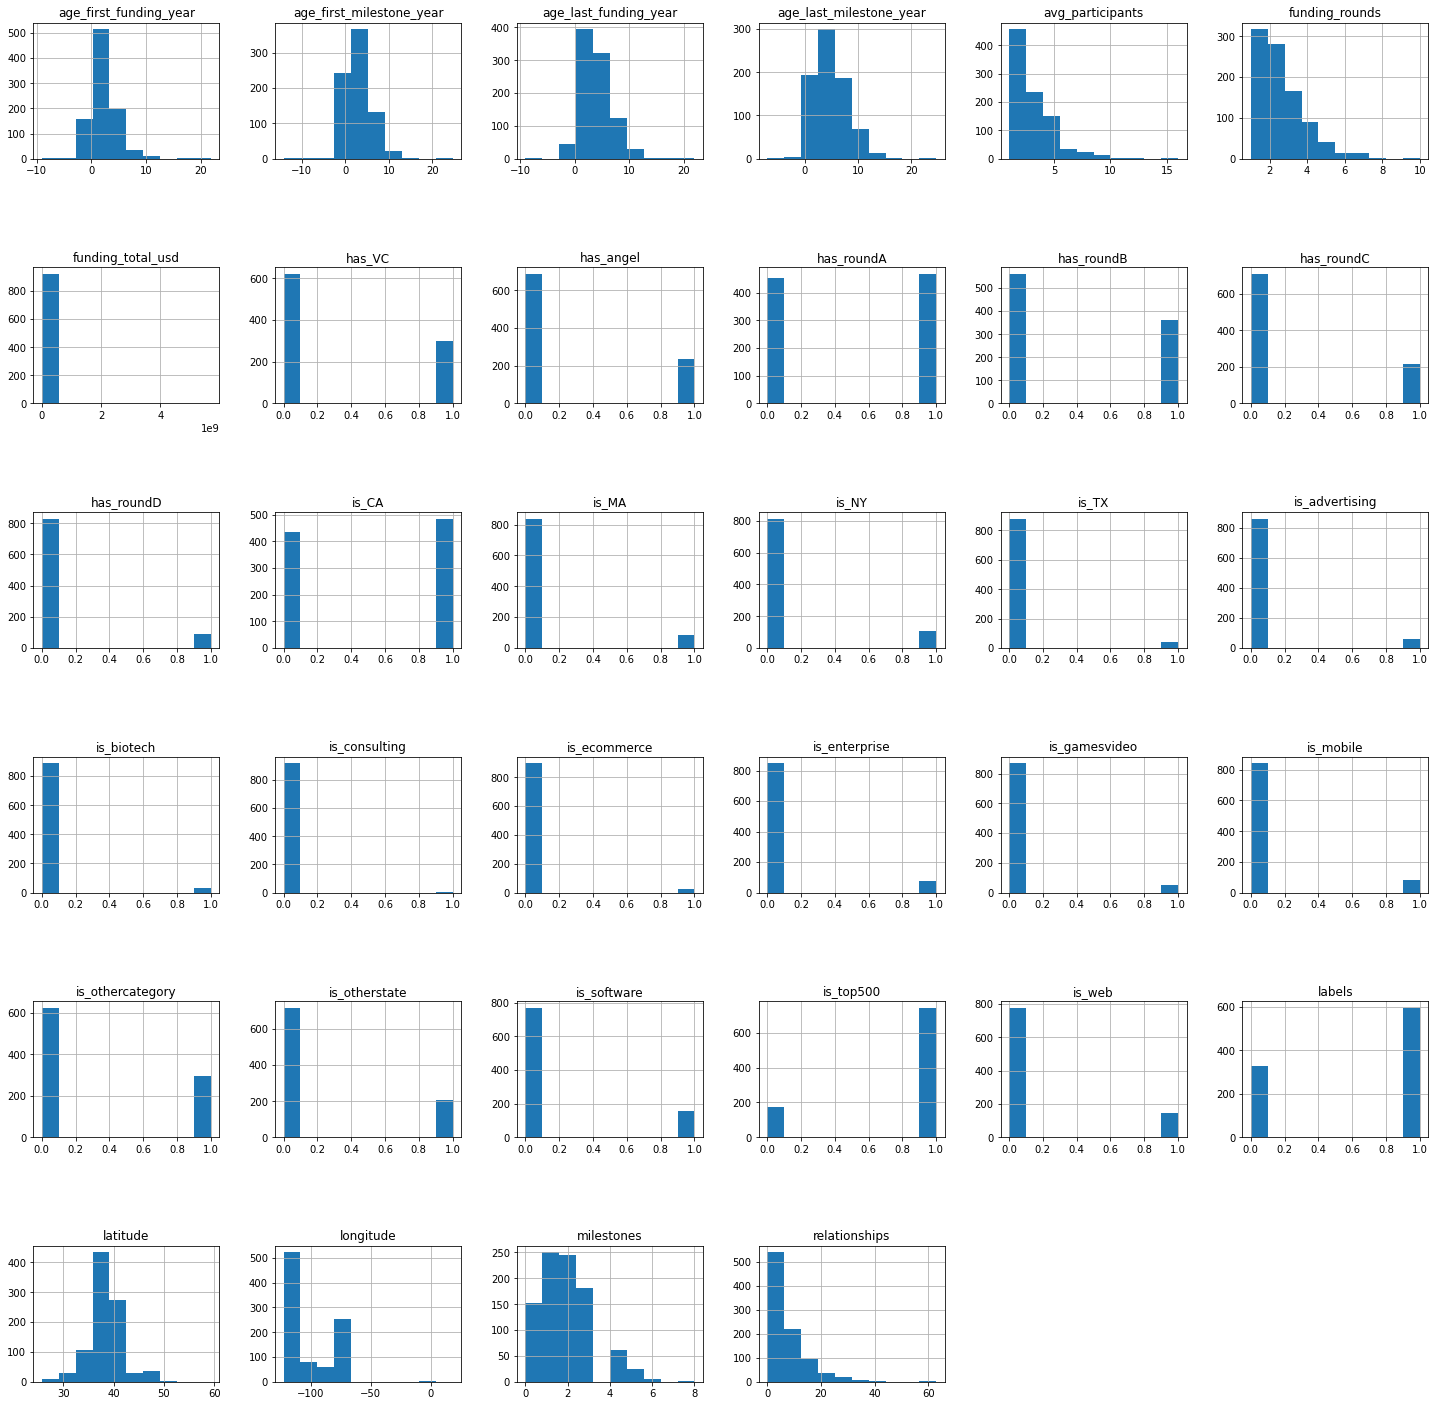

In [20]:
df.hist(figsize=(25,25))
plt.subplots_adjust(hspace=.8);

In [21]:
df.funding_total_usd.describe()

count    9.220000e+02
mean     2.541017e+07
std      1.897371e+08
min      1.100000e+04
25%      2.712500e+06
50%      1.000000e+07
75%      2.465264e+07
max      5.700000e+09
Name: funding_total_usd, dtype: float64

In [22]:
df.shape

(922, 44)

In [23]:
df.to_csv('/Users/yusufsmacbookpro/Desktop/start_up_cleaned.csv', index = False)